<a href="https://colab.research.google.com/github/allysonbueno/ef_test/blob/main/Quest%C3%A3o_4_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pip install pyodbc
import pyodbc

In [ ]:
server = 'localhost' 
database = 'DesafioEF' 
username = 'datalake' 
password = 'xxxxxxxxxx'  

In [ ]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = conn.cursor()

In [ ]:
query1 = "SELECT * FROM Producao_2019;"
df_Prod_2019 = pd.read_sql(query1, conn)

query2 = "SELECT * FROM PIB_CEPEA_PIB WHERE ANO = 2019;"
df_PIB_2019 = pd.read_sql(query2, conn)
df_PIB_2019.drop(['Agronegocio_Insumos', 'Agronegocio_Agropecuaria','Agronegocio_Industria','Agronegocio_Serviços','Total_Agronegócio'], axis=1, inplace=True)

In [ ]:
df_PIB_2019[['ANO','Agricola_Insumos','Agricola_Agropecuária','Pecuario_Insumos','Pecuario_Agropecuária']]

,ANO,Agricola_Insumos,Agricola_Agropecuária,Pecuario_Insumos,Pecuario_Agropecuária
0,2019,53871.0,212553.27,25259.81,138481.93


In [ ]:
prod_total_ton_2019 = pd.DataFrame({'Total_Producao_Ton_2019':[df_Prod_2019["ton_2019"].sum()]})

In [ ]:
total_gastos_insumos = ((df_PIB_2019['Agricola_Insumos'] + df_PIB_2019['Pecuario_Insumos']) / prod_total_ton_2019['Total_Producao_Ton_2019']) * 100

In [ ]:
total_gastos_agropecuario = ((df_PIB_2019['Agricola_Agropecuária'] + df_PIB_2019['Pecuario_Agropecuária']) / prod_total_ton_2019['Total_Producao_Ton_2019']) * 100

In [ ]:
df_total = pd.DataFrame({
    "Total_Produzido_Ton": [prod_total_ton_2019['Total_Producao_Ton_2019'].loc[0]],
    #"Total_Pecuario": [total_gastos_agropecuario.loc[0]],
    "Total_Agropecuario": [total_gastos_agropecuario.loc[0]]
})

In [ ]:
df_corr = df_PIB_2019[['Agricola_Insumos','Agricola_Agropecuária','Pecuario_Insumos','Pecuario_Agropecuária']]

In [ ]:
df_Prod_2019.corr()

,HA_2019,HA_Maio,HA_Junho,ton_2019,ton_Maio,ton_Junho
HA_2019,1.000000,0.999860,0.999874,0.996060,0.989983,0.990034
HA_Maio,0.999860,1.000000,0.999994,0.996756,0.990644,0.990632
HA_Junho,0.999874,0.999994,1.000000,0.996722,0.990667,0.990687
ton_2019,0.996060,0.996756,0.996722,1.000000,0.992835,0.992638
ton_Maio,0.989983,0.990644,0.990667,0.992835,1.000000,0.999899
ton_Junho,0.990034,0.990632,0.990687,0.992638,0.999899,1.000000


In [ ]:
df_PIB_2019

,ANO,Agricola_Insumos,Agricola_Agropecuária,Agricola_Indústria,Agricola_Serviços,Total_Ramo_Agricola,Pecuario_Insumos,Pecuario_Agropecuária,Pecuario_Indústria,Pecuario_Serviços,Total_Ramo_Pecuario
0,2019,53871.0,212553.27,361527.85,430287.33,1058239.45,25259.81,138481.93,105080.5,225933.69,494755.93


In [ ]:
df_agricola = pd.DataFrame({
    "Segmentos": ["Insumos","Agropecuaria","Industria","Servicos"],
    "Ramo Agricola": [df_PIB_2019["Agricola_Insumos"].loc[0], df_PIB_2019["Agricola_Agropecuária"].loc[0], df_PIB_2019["Agricola_Indústria"].loc[0], df_PIB_2019["Agricola_Serviços"].loc[0]],
    "Ramo Pecuario": [df_PIB_2019["Pecuario_Insumos"].loc[0], df_PIB_2019["Pecuario_Agropecuária"].loc[0], df_PIB_2019["Pecuario_Indústria"].loc[0], df_PIB_2019["Pecuario_Serviços"].loc[0]]
}) 

In [ ]:
df_agricola_corr = df_agricola[['Ramo Agricola','Ramo Pecuario']]

# RESPOSTA:

In [ ]:
df_Prod_2019.corr()

,HA_2019,HA_Maio,HA_Junho,ton_2019,ton_Maio,ton_Junho
HA_2019,1.000000,0.999860,0.999874,0.996060,0.989983,0.990034
HA_Maio,0.999860,1.000000,0.999994,0.996756,0.990644,0.990632
HA_Junho,0.999874,0.999994,1.000000,0.996722,0.990667,0.990687
ton_2019,0.996060,0.996756,0.996722,1.000000,0.992835,0.992638
ton_Maio,0.989983,0.990644,0.990667,0.992835,1.000000,0.999899
ton_Junho,0.990034,0.990632,0.990687,0.992638,0.999899,1.000000


In [ ]:
df_Prod_2019.corr().style.background_gradient(cmap='coolwarm')

,HA_2019,HA_Maio,HA_Junho,ton_2019,ton_Maio,ton_Junho
HA_2019,1.000000,0.999860,0.999874,0.996060,0.989983,0.990034
HA_Maio,0.999860,1.000000,0.999994,0.996756,0.990644,0.990632
HA_Junho,0.999874,0.999994,1.000000,0.996722,0.990667,0.990687
ton_2019,0.996060,0.996756,0.996722,1.000000,0.992835,0.992638
ton_Maio,0.989983,0.990644,0.990667,0.992835,1.000000,0.999899
ton_Junho,0.990034,0.990632,0.990687,0.992638,0.999899,1.000000


In [ ]:
df_agricola_corr.corr()

,Ramo Agricola,Ramo Pecuario
Ramo Agricola,1.000000,0.841998
Ramo Pecuario,0.841998,1.000000


In [ ]:
df_agricola_corr.corr().style.background_gradient(cmap='coolwarm')

,Ramo Agricola,Ramo Pecuario
Ramo Agricola,1.000000,0.841998
Ramo Pecuario,0.841998,1.000000


# FIM RESPOSTA

In [ ]:
#### DESCONSIDERAR OS TESTES ABAIXO

In [ ]:
df_agricola = pd.DataFrame({
    "Segmentos": ["Insumos","Agropecuaria","Industria","Servicos"],
    "Ramo Agricola": [df_PIB_2019["Agricola_Insumos"].loc[0], df_PIB_2019["Agricola_Agropecuária"].loc[0], df_PIB_2019["Agricola_Indústria"].loc[0], df_PIB_2019["Agricola_Serviços"].loc[0]]
}) 
df_agricola

,Segmentos,Ramo Agricola
0,Insumos,53871.00
1,Agropecuaria,212553.27
2,Industria,361527.85
3,Servicos,430287.33


In [ ]:
prod_total_ton_2019 = pd.DataFrame({'Total_Producao_2019':[df_Prod_2019["ton_2019"].sum()]})
prod_total_ton_2019

,Total_Producao_2019
0,241462754


In [ ]:
df_agricola.corr()

,Agricola
Agricola,1.0


In [ ]:
df_cor_PIB_2019[['Insumos','Agropecuaria','Industria','Servicos']]

,Insumos,Agropecuaria,Industria,Servicos
0,53871.00,212553.27,361527.85,430287.33
1,25259.81,138481.93,105080.50,225933.69


In [ ]:
df_cor_PIB_2019[['Total']].loc[[0]]

,Total
0,1058239.45


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1de84a9b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de84a9bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de84a9b310>],
 'medians': [<matplotlib.lines.Line2D at 0x1de84aa8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de84aa87c0>],
 'means': []}

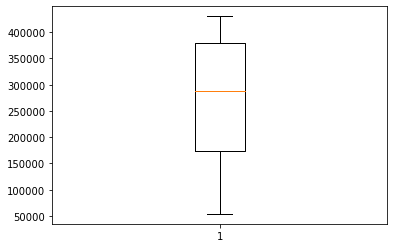

In [ ]:
#x = df_agricola[['Segmentos']]
#y = prod_total_ton_2019['Total_Producao_2019']
#plt.xlabel(x)
#plt.ylabem(y)
plt.boxplot(df_agricola['Ramo Agricola'])

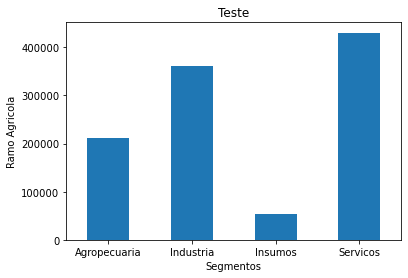

In [ ]:
#x = [prod_total_ton_2019["Total_Producao_2019"]]
#x = df_cor_PIB_2019[['Total']].loc[[0]]
df_agricola.groupby("Segmentos")["Ramo Agricola"].sum().plot.bar(title="Teste")
plt.xlabel("Segmentos")
plt.ylabel("Ramo Agricola")
plt.xticks(rotation='horizontal');

In [ ]:
x = df_cor_PIB_2019[['Insumos','Agropecuaria','Industria','Servicos']].loc[[0]]
# y = df_cor_PIB_2019[['Insumos','Agropecuaria','Industria','Servicos']].loc[[1]]
y = [prod_total_ton_2019,prod_total_ton_2019,prod_total_ton_2019,prod_total_ton_2019]
# plt.scatter(x,y)

df_ramos.corr()

,Agricola,Pecuario
Agricola,1.000000,0.841998
Pecuario,0.841998,1.000000


In [ ]:
ax = sns.lmplot(x="X", data=df_ramos)
ax = sns.lmplot(y="Y", data=)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('PIB Agricola x Produção 2019', fontsize=14, y=1.02)
ax.set_xlabels('Ramo Agricola', fontsize=14)
ax.set_ylabels('Total Toneladas 2019', fontsize=14)
ax

In [ ]:
# 4) DEFINA A CORRELAÇÃO ENTRE A PRODUÇÃO AGRÍCOLA E O PIB DO RAMO AGRÍCOLA E PECUÁRIO EM 2019. 


# 	QUAL SEGMENTO POSSUI MAIOR CORRELAÇÃO E QUAL POSSUI MENOR CORRELAÇÃO? 
#   DEMONSTRE NUM GRÁFICO E EXPLIQUE OS COEFICIENTES.
df_Prod_2019[['UF','ton_2019']]

In [ ]:
df_PIB_2019

,ANO,Agricola_Insumos,Agricola_Agropecuária,Agricola_Indústria,Agricola_Serviços,Total_Ramo_Agricola,Pecuario_Insumos,Pecuario_Agropecuária,Pecuario_Indústria,Pecuario_Serviços,Total_Ramo_Pecuario
0,2019,53871.0,212553.27,361527.85,430287.33,1058239.45,25259.81,138481.93,105080.5,225933.69,494755.93


In [ ]:
prod_total_ton_2019

,Total_Producao_2019
0,241462754


In [ ]:
df_ramos.corr()

,Agricola,Pecuario
Agricola,1.000000,0.841998
Pecuario,0.841998,1.000000


<AxesSubplot:>

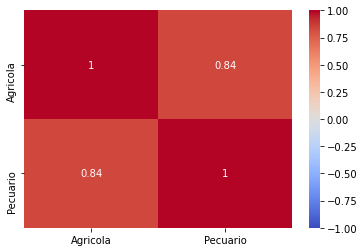

In [ ]:
sns.heatmap(df_ramos.corr(), annot=True, vmin=-1,vmax=1, cmap='coolwarm')

<AxesSubplot:>

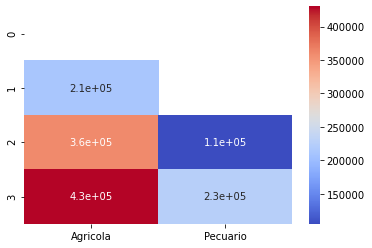

In [ ]:
mask = np.triu(df_ramos)
sns.heatmap(df_ramos, annot=True, cmap='coolwarm',mask=mask)